In [1]:
import matplotlib
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os


import seaborn as sns
from matplotlib import rcParams

#绘图前的基本设置

myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\Times New Roman.tiff') # 设置字体

# 设置matplotlib正常显示中文和负号
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
matplotlib.rcParams['font.size'] = 12

# matplotlib.rcParams['font.sans-serif']=['NSimSun']   # 用黑体显示中文
# matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
# matplotlib.rcParams['font.size'] = 0.3
# matplotlib.rcParams['font.family'] = 'sans-serif'  
matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'  # NSimSun 新宋体字体   宋体：SimSuncss

%matplotlib inline  
#内嵌绘图，并且可以省略掉plt.show()这一步
# os.chdir('D:\\BaiduSyncdisk\\EHF-文献-数据-文章\\EHF\\EHF\\figure-统计\\mean') #笔记本电脑
os.chdir(r'E:\BaiduSyncdisk\热浪博士论文\计算表格\Chapter4')     #台式机

cmap =list(["steelblue", "yellowgreen","orange","lightcoral","red", "green","lightskyblue"])

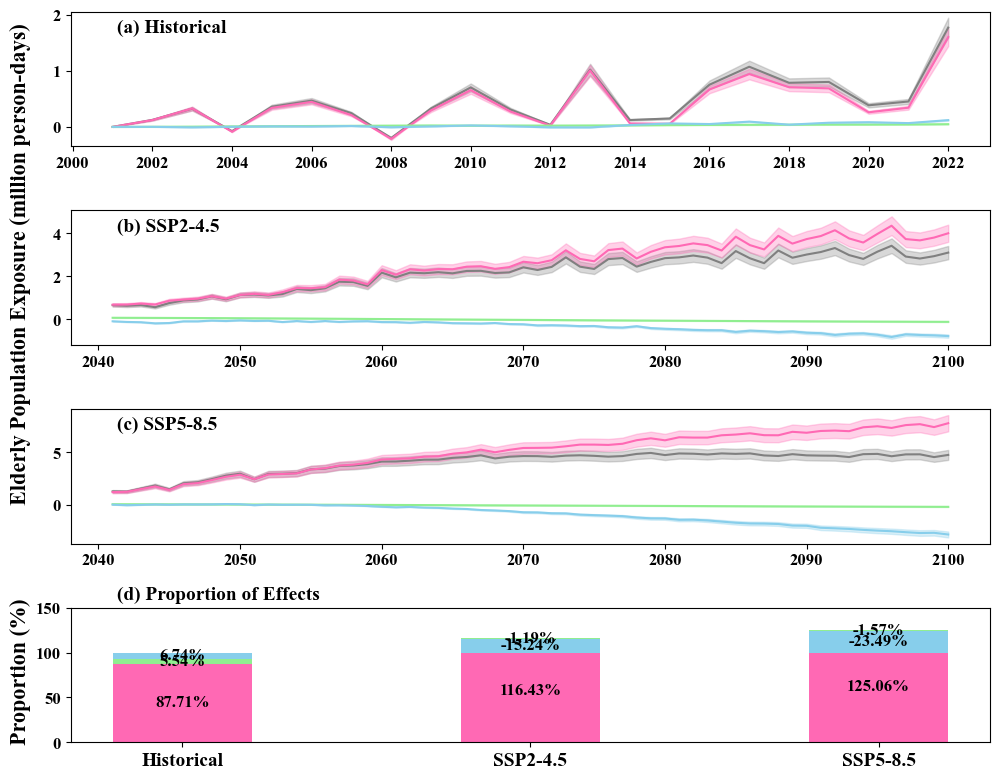

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Load data
file_path = 'Decompose_effects_summary_2001base_future+historical.csv'
df = pd.read_csv(file_path)

# Calculate total exposure if not already calculated
if 'total_exposure' not in df.columns:
    df['total_exposure'] = df['climate_effect'] + df['combined_effect'] + df['population_effect']

# Define scenarios to plot
scenarios = [
    ('TM_historical', 2000, 2022),
    ('TM_SSP245', 2041, 2100),
    ('TM_SSP585', 2041, 2100)
]

# Labels for scenarios, needed for indexing correctly
labels = {
    'TM_historical': 'Historical',
    'TM_SSP245': 'SSP2-4.5',
    'TM_SSP585': 'SSP5-8.5'
}

# Color dictionary for plotting
colors = {
    'total_exposure': 'gray',
    'climate_effect': 'hotpink',
    'population_effect': 'lightgreen',
    'combined_effect': 'skyblue'
}

subplot_labels = ['(a)', '(b)', '(c)', '(d)']  # Subplot labels for clarity

# Initialize plot
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
formatter = FuncFormatter(lambda x, pos: f'{int(x/1e8)}')

# Initialize a list to hold the lines and labels for the legend
lines = []
new_labels = []

# Plot each scenario
for i, (scenario, start_year, end_year) in enumerate(scenarios):
    ax = axes[i]
    scenario_data = df[(df['variable'] == scenario) & (df['year'] >= start_year) & (df['year'] <= end_year)]
    for effect in ['total_exposure', 'climate_effect', 'population_effect', 'combined_effect']:
        line, = ax.plot(scenario_data['year'], scenario_data[effect], label=effect.capitalize(), color=colors[effect])
        lines.append(line)  # Add the line to the lines list
        new_labels.append(effect.capitalize())  # Add the label to the new_labels list
        uncertainty = scenario_data[effect] * 0.1
        ax.fill_between(scenario_data['year'], scenario_data[effect] - uncertainty, scenario_data[effect] + uncertainty, color=colors[effect], alpha=0.3)
    ax.text(0.05, 0.95, f"{subplot_labels[i]} {labels[scenario]}", transform=ax.transAxes, ha='left', va='top', fontsize=14)
    ax.yaxis.set_major_formatter(formatter)
    if scenario == 'TM_historical':
        ax.set_xticks(range(2000, 2023, 2))
        ax.set_xticklabels([str(year) for year in range(2000, 2023, 2)])

# Fourth subplot - Stacked Bar Chart
ax = axes[3]
summary = df.groupby('variable').agg({
    'total_exposure': 'sum',
    'climate_effect': 'sum',
    'population_effect': 'sum',
    'combined_effect': 'sum'
}).reset_index()

# Convert to percentages
for effect in ['climate_effect', 'population_effect', 'combined_effect']:
    summary[effect] = summary[effect] / summary['total_exposure'] * 100

# Reorder for bar chart according to specified order
summary['order'] = summary['variable'].apply(lambda x: labels[x])
summary.sort_values('order', inplace=True)

bar_width = 0.4
index = np.arange(len(scenarios))
bottom = np.zeros(len(scenarios))

for effect in ['climate_effect', 'population_effect', 'combined_effect']:
    bars = ax.bar(index, summary[effect], bar_width, bottom=bottom, label=effect.replace('_', ' ').capitalize(), color=colors[effect])
    for bar in bars:
        y_val = bar.get_y() + bar.get_height() / 2
        ax.text(bar.get_x() + bar.get_width() / 2, y_val, f"{bar.get_height():.2f}%", ha='center', va='center', color='black')
    bottom += summary[effect]

ax.set_xticks(index)
ax.set_xticklabels([labels[scenario] for scenario, _, _ in scenarios], fontsize=14)
ax.set_ylim(0, 150)  # Set the y-axis range from 0% to 150%

fig.text(0.002, 0.66, 'Elderly Population Exposure (million person-days)', va='center', rotation='vertical', fontsize=16)
fig.text(0.002, 0.15, 'Proportion (%)', va='center', rotation='vertical', fontsize=16)

# Adjust layout for legend and overall tightness
ax.set_title(f"{subplot_labels[3]} Proportion of Effects", loc='left', fontsize=14, fontweight='bold', x=0.05)
# fig.legend(lines, new_labels, loc='lower center', ncol=4, bbox_to_anchor=(0.3, 0.225, 0.7,1.01), handletextpad=0.4, handlelength=1.1)
plt.tight_layout(rect=[0.01, 0.005, 1, 1])  # Adjust layout to make room for legend
plt.show()

# Save the figure
fig.savefig('PD-04-08-热浪暴露效应分解.png', dpi=400, facecolor="none", transparent=True)


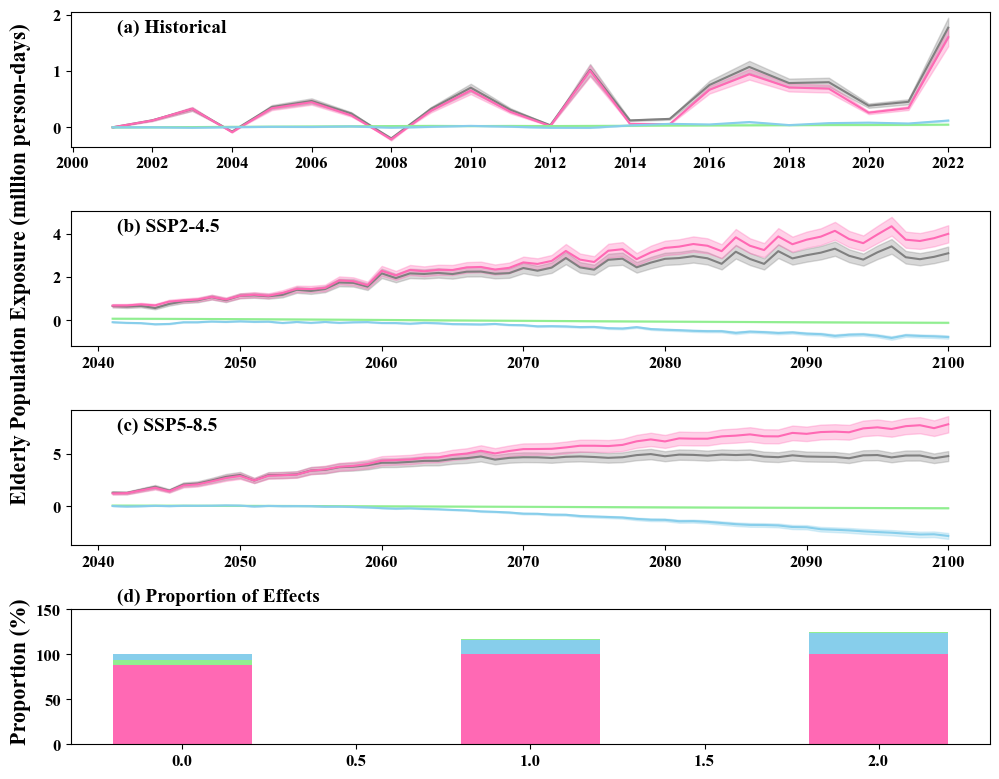

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Load data
file_path = 'Decompose_effects_summary_2001base_future+historical.csv'
df = pd.read_csv(file_path)

# Calculate total exposure if not already calculated
if 'total_exposure' not in df.columns:
    df['total_exposure'] = df['climate_effect'] + df['combined_effect'] + df['population_effect']

# Define scenarios to plot
scenarios = [
    ('TM_historical', 2000, 2022),
    ('TM_SSP245', 2041, 2100),
    ('TM_SSP585', 2041, 2100)
]

# Labels for scenarios, needed for indexing correctly
labels = {
    'TM_historical': 'Historical',
    'TM_SSP245': 'SSP2-4.5',
    'TM_SSP585': 'SSP5-8.5'
}

# Color dictionary for plotting
colors = {
    'total_exposure': 'gray',
    'climate_effect': 'hotpink',
    'population_effect': 'lightgreen',
    'combined_effect': 'skyblue'
}

subplot_labels = ['(a)', '(b)', '(c)', '(d)']  # Subplot labels for clarity

# Initialize plot
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
formatter = FuncFormatter(lambda x, pos: f'{int(x/1e8)}')

# Initialize a list to hold the lines and labels for the legend
lines = []
new_labels = []

# Plot each scenario
for i, (scenario, start_year, end_year) in enumerate(scenarios):
    ax = axes[i]
    scenario_data = df[(df['variable'] == scenario) & (df['year'] >= start_year) & (df['year'] <= end_year)]
    for effect in ['total_exposure', 'climate_effect', 'population_effect', 'combined_effect']:
        line, = ax.plot(scenario_data['year'], scenario_data[effect], label=effect.capitalize(), color=colors[effect])
        lines.append(line)  # Add the line to the lines list
        new_labels.append(effect.capitalize())  # Add the label to the new_labels list
        uncertainty = scenario_data[effect] * 0.1
        ax.fill_between(scenario_data['year'], scenario_data[effect] - uncertainty, scenario_data[effect] + uncertainty, color=colors[effect], alpha=0.3)
    ax.text(0.05, 0.95, f"{subplot_labels[i]} {labels[scenario]}", transform=ax.transAxes, ha='left', va='top', fontsize=14)
    ax.yaxis.set_major_formatter(formatter)
    if scenario == 'TM_historical':
        ax.set_xticks(range(2000, 2023, 2))
        ax.set_xticklabels([str(year) for year in range(2000, 2023, 2)])

# Fourth subplot - Stacked Bar Chart
ax = axes[3]
summary = df.groupby('variable').agg({
    'total_exposure': 'sum',
    'climate_effect': 'sum',
    'population_effect': 'sum',
    'combined_effect': 'sum'
}).reset_index()

# Convert to percentages
for effect in ['climate_effect', 'population_effect', 'combined_effect']:
    summary[effect] = summary[effect] / summary['total_exposure'] * 100

# Reorder for bar chart according to specified order
summary['order'] = summary['variable'].apply(lambda x: labels[x])
summary.sort_values('order', inplace=True)

bar_width = 0.4
index = np.arange(len(scenarios))
bottom = np.zeros(len(scenarios))
for effect in ['climate_effect', 'population_effect', 'combined_effect']:
    bars = ax.bar(index, summary[effect], bar_width, bottom=bottom, label=effect.replace('_', ' ').capitalize(), color=colors[effect])
    for bar in bars:
        y_val = bar.get_y() + bar.get_height() / 2  # Center of the bar
        # Adjust y_val to avoid overlap, e.g., move the label slightly above the bar
        y_offset = 12  # This can be adjusted to increase the space between the bar and the label
        # ax.text(bar.get_x() + bar.get_width() / 2, y_val + y_offset, f"{bar.get_height():.2f}%", ha='center', va='center', color='black')
    bottom += summary[effect]

# ax.set_xticks(index)
# ax.set_xticklabels([labels[scenario] for scenario, _, _ in scenarios], fontsize=14)

ax.set_ylim(0, 150)  # Set the y-axis range from 0% to 150%

fig.text(0.002, 0.66, 'Elderly Population Exposure (million person-days)', va='center', rotation='vertical', fontsize=16)
fig.text(0.002, 0.15, 'Proportion (%)', va='center', rotation='vertical', fontsize=16)

# Adjust layout for legend and overall tightness
ax.set_title(f"{subplot_labels[3]} Proportion of Effects", loc='left', fontsize=14, fontweight='bold', x=0.05)
# fig.legend(lines, new_labels, loc='lower center', ncol=4, bbox_to_anchor=(0.3, 0.225, 0.7,1.01), handletextpad=0.4, handlelength=1.1)
plt.tight_layout(rect=[0.01, 0.005, 1, 1])  # Adjust layout to make room for legend
plt.show()

# Save the figure
fig.savefig('PD-04-08-热浪暴露效应分解-无标注.png', dpi=400, facecolor="none", transparent=True)


In [ ]:
z'z